# Player Analysis for BPL 10

Author: Cearlmau

This file breaks down the player distribution of BPL teams based on team and level
at various points in the BPL 10 event. The goal of this data analysis is to look at
whether or not the team distributions had an effect on overall team player levels, and
how that may contribute to a team's success.

Special thanks to Moowiz for providing the data.

In [2]:
#Libraries and Data Sources
import csv
import pandas as pd
import numpy as np
import plotly
import datetime
import matplotlib
import matplotlib.pyplot as plt


teams_data = pd.read_csv("../../data/bpl-10_teams.csv")

## Background:

Path of Exile is an action RPG game whose premise revolves around the player killing enemies using a preset character with an extensive amount of customization. The killed enemies generate loot and other bonuses which the player can use to augment and upgrade their character. Path of Exile is an online game, which means that players can interact with one another, trading each items and/or playing in the same instance as one another.

BPL is a quarterly community event that coincides with each major update that Path of Exile receives. Around 2000 players is placed inside an isolated and newly created instance (referred to as a "league") where they must work together with their designated team to acquire items and accomplish objectives("bounties") defined by the organizers. Doing so accumulates points towards their team total, and at the end the teams are ranked based on how many points they have acquired over the four-day event. There are 4 teams for BPL 10.

Each preset character has a specific upgrade called an "ascendancy". This allows the character to gain unique powers that are inaccesible to other presets. Each character is permitted only one ascendancy. To balance out the teams, the organizers have made it so that each team can only have a subset of the presets. One of the ascendancies, "Sabateur", is banned.

One thing to note is that ascendancy bonuses are acquired in portions. To be fully ascended is to grab all possible upgrades related to that ascendancy.

Each character also has a stage-based development referred to as "levels". Characters will start off weak. As they kill enemies they acquire numerical reward ("experience points"). When they have acquired sufficient experience points, they will "level up", and achieve the next stage of their character progression. In Path of Exile, a character can have levels from 1 to 100, inclusive of both ends. Typically, having more levels mean that your character becomes stronger, as they get bonuses to customize their character with each level.

The playthrough of a character is broken down into two parts: campaign, where the character goes through a story-driven progression, and endgame, where the player can tackle various content unavailable in campaign. All of BPL's bounties occur in the endgame. 

A large portion of the endgame takes place in the Atlas, where players can enter special areas to fight harder enemies and acquire more rewarding loot. Completing sections of the Atlas awards players with the power to customize the Atlas in the form of "atlas passives". Note that is it not required that a player needs all atlas passives to participate in the endgame, but having more gives the player more options in their playstyle.

The data is broken down into three csvs. 
**bpl-10_teams.csv** contains information at the end of the event. It contains finalized data of all the players, including level, whether or not a player has fully ascended, and the number of atlas passives they have acquired. 
**bpl-10_level_data.csv** contains progressive tracking of every single character's levelling over the course of the event. Snapshots of each character are taken at approximately every 15 minutes. Each entry contains the player, their team name, their character level, and time of snapshot.
**bpl-10_ascendancy.csv** contains their character name, their ascendancy, and their team.

For anonymity and ethics, player names are replaced with hashed values.


# Initial Analysis

There's a lot of cleaning required for the second dataset. We'll come back to it when we start actually analyzing. For now let's look at **bpl-10_teams.csv**.

For each player, **bpl-10_teams.csv** contains the level, whether or not the player has fully ascended their character, and the number of atlas passives that they've allocated.

As a brief summary of the endgame, players will progress their character's Atlas, which takes the form of large number of repeatable zones with randomized rewards and difficulty know as *maps*. Players can customize their Atlas with Atlas passives to acquire specific loot or fight specific monsters. Every completion of an unique map will yield the player 1 Atlas passive. To simplify, *a player's allocated Atlas passive count is the same as the player's Atlas completion*. This makes it easy to assess a player's progression in the endgame, as certain bonuses or content in the Atlas are locked behind a certain amount of Atlas passives.

The number of players above level 69 is 83.92%


array([[<Axes: title={'center': 'level'}>]], dtype=object)

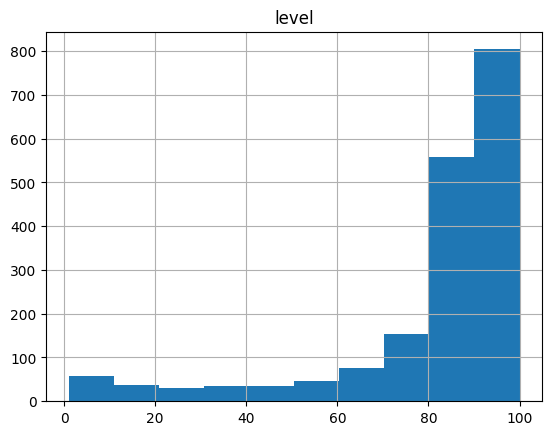

In [3]:
#Number of players that exceed level 69
print("The number of players above level 69 is", 
    str(round(100 * len(teams_data[teams_data['level'] >= 69])/len(teams_data), 2)) + "%")
teams_data.hist(column='level')

We can see that the majority of players (83.92%) are greater than level 69. Why 69? Because that is the baseline zone level of the start of endgame. One thing to note is that player level doesn't necessarily correspond one to one with zone level of endgame progression (player endgame levels can range from 69 to 100, while zone level only goes from 69 to 83*). A level 76 character might not be able to complete a zone of level 76, for example. From anecdotal experience, we can split the endgame character levels into 3 sections: 69-80, 81-90, and 91-100 as those roughly equate to the tiers of difficulty associated with the Atlas (69-79 =  white maps, 80-89 = yellow maps, 90-100 = red maps).

If we plot out just the endgame split, it will look something like below:



*Zones can actually go to 86, but those are unique circumstances that do not necessarily reflect the majority of the content.

Number of people in each category of atlas difficulty: White maps: 148   Yellow maps:  455   Red maps:  930


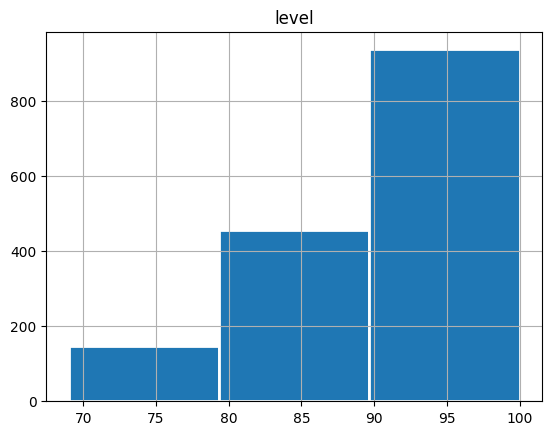

In [4]:
endgame_team_data = teams_data[teams_data['level'] >= 69]
endgame_team_data.hist(column='level', bins=3, edgecolor='white', linewidth=2)

white_maps = teams_data[(teams_data['level'] >= 69) & (teams_data['level'] < 80)]
yellow_maps = teams_data[(teams_data['level'] >= 80) & (teams_data['level'] < 90)]
red_maps = teams_data[(teams_data['level'] >= 90) & (teams_data['level'] < 100)]
print("Number of people in each category of atlas difficulty:", 
      "White maps:", len(white_maps), " ", 
      "Yellow maps: ", len(yellow_maps), " ", 
      "Red maps: ", len(red_maps))

We can see a remarkable amount of people have reached the 90+ threshold. This is where most of the bounties of event occur, so seeing as how roughly 60% of the players who have made it into endgame have engaged with red tiered maps.

We can try mapping levels against allocated atlas passives to see how the distribution is further spread. We know of levels distributions, but does it tie in nicely with atlas completion?

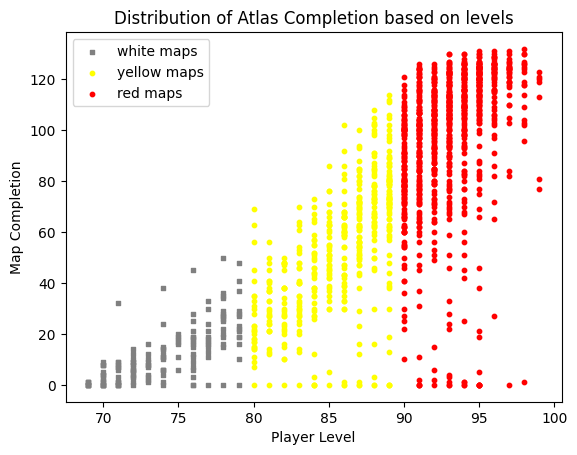

In [5]:
x = range(100)
y = range(0,115)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(white_maps['level'], white_maps['num_atlas_passives_allocated'], s=10, c='grey', marker="s", label='white maps')
ax1.scatter(yellow_maps['level'], yellow_maps['num_atlas_passives_allocated'], s=10, c='yellow', marker="o", label='yellow maps')
ax1.scatter(red_maps['level'], red_maps['num_atlas_passives_allocated'], s=10, c='red', marker="o", label='red maps')
plt.legend(loc='upper left')
plt.title(label="Distribution of Atlas Completion based on levels")
plt.ylabel("Map Completion")
plt.xlabel("Player Level")
plt.show()

We can see that while the majority of players follow the general trend, there are outlier with players having very little map completion despite reached a certain level. It is true that player's progressing the endgame will earn levels as they kill the monsters inhabiting each map, but as party-play is allowed, there are players who "leech off" experience from other players. There's also the case where some of the content, such as Heist, do not require progressing the Atlas. While the majority of the players seem to follow a trend of general upwards progression, there are a large amount of outliers.

One of the final things we can look at is the fully ascended characteristic. As mentioned previously, we can look at the ascendancies of each player. One key detail is that ascendancies occur in steps. Players have a total of 8 ascendancy points to allocate, 6 of which occur during the story campaign, and 2 during the endgame, roughly around yellow maps to early red maps (access to the trial of Ascendancy begins around this time). A significant amount of the player's power is gained with full ascendancy, so players with influence will have all ascendancy points allocated. Based on this, I am assuming that *fully ascended* characters are considered to be players who can contribute to the score of their team.

Number of fully ascended players: White maps: 37   Yellow maps:  366   Red maps:  920


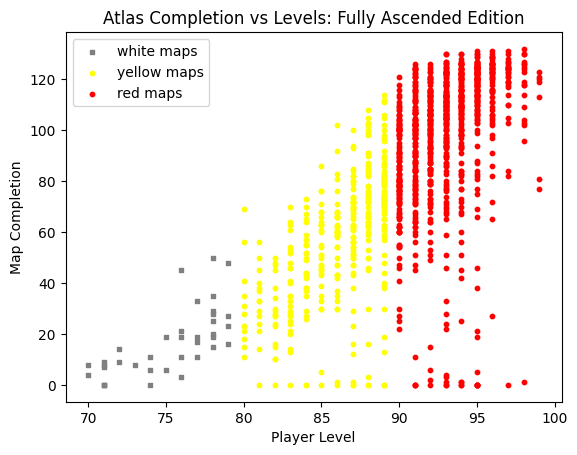

In [6]:
white_maps = white_maps[white_maps['fully_ascended'] == True]
yellow_maps = yellow_maps[yellow_maps['fully_ascended'] == True]
red_maps = red_maps[red_maps['fully_ascended'] == True]
print("Number of fully ascended players:", 
      "White maps:", len(white_maps), " ", 
      "Yellow maps: ", len(yellow_maps), " ", 
      "Red maps: ", len(red_maps))

x = range(100)
y = range(0,115)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(white_maps['level'], white_maps['num_atlas_passives_allocated'], s=10, c='grey', marker="s", label='white maps')
ax1.scatter(yellow_maps['level'], yellow_maps['num_atlas_passives_allocated'], s=10, c='yellow', marker="o", label='yellow maps')
ax1.scatter(red_maps['level'], red_maps['num_atlas_passives_allocated'], s=10, c='red', marker="o", label='red maps')
plt.legend(loc='upper left')
plt.title(label="Atlas Completion vs Levels: Fully Ascended Edition")
plt.ylabel("Map Completion")
plt.xlabel("Player Level")
plt.show()

We can see that the number of fully ascended players in white maps drop off by 75%. Yellow maps drop off by about 20%. Red maps drop by barely 1%. This suggests the number of full powered players, those capable of contributing to the score of the team, are capable of running red maps. Those in white and yellow are either too weak or still progressing to get to that point of contribution. 

The fact that players in red maps (basically) do not differ also indicate that those who can contribute to the team score are those who are fully ascended and can run red maps. Those are the players who have the ability to complete objectives and get points. So overall we are looking for players in red maps who have their full ascendancy as our focus. 

# Team Breakdowns

Now we come to the interesting part of the analysis. BPL 10 is split into 4 teams, and each team contains a subsets of the ascendancies in the game that players have access to. Not every team has the same ascendancies, and some teams overlap.

In [7]:
#The first thing we have to do is to assign each player in the teams data their team and ascendancy. 
#That data can be found in the ascendancy data, so we have to acquire it and put it in teams.

team_names = {170:"Royals", 171:"Merchants", 172:"Corsairs", 173:"Explorers"}
ascendancy_data = pd.read_csv("../../data/bpl-10_ascendancy.csv")

joined_data = teams_data.merge(ascendancy_data, how='inner', on='user_id')

In [8]:
#Get the team splits
base_classes = ['Witch', 'Scion', 'Duelist', 'Marauder', 'Templar', 'Ranger', 'Shadow']

cor = joined_data[joined_data['team_id'] == 172]
exp = joined_data[joined_data['team_id'] == 173]
mer = joined_data[joined_data['team_id'] == 171]
roy = joined_data[joined_data['team_id'] == 170]

#
def printTeamInfo(team):
    print("Team", team_names[team['team_id'].unique()[0]])
    print(len(team), "players")
    ascend = team.character_class.unique()
    for base in base_classes:
        ascend = np.delete(ascend, np.where(ascend == base), axis=0)
    print("Ascendancies: ", ascend)
    print()


printTeamInfo(cor)
printTeamInfo(exp)
printTeamInfo(mer)
printTeamInfo(roy)

Team Corsairs
515 players
Ascendancies:  ['Hierophant' 'Juggernaut' 'Occultist' 'Trickster' 'Necromancer'
 'Ascendant' 'Champion' 'Deadeye' 'Raider']

Team Explorers
516 players
Ascendancies:  ['Guardian' 'Occultist' 'Gladiator' 'Chieftain' 'Inquisitor' 'Slayer'
 'Raider' 'Ascendant' 'Assassin']

Team Merchants
519 players
Ascendancies:  ['Ascendant' 'Elementalist' 'Juggernaut' 'Guardian' 'Gladiator'
 'Trickster' 'Pathfinder' 'Champion' 'Berserker']

Team Royals
506 players
Ascendancies:  ['Pathfinder' 'Elementalist' 'Inquisitor' 'Slayer' 'Necromancer'
 'Assassin' 'Ascendant' 'Berserker' 'Deadeye' 'Juggernaut']



We can see the overall number of players that each team has. Before we break down each team based on ascendancies, note that we removed all the base classes from number of ascendancies for each team. This is because not every character on each team has ascended. If we took them out, the actual number of each team is

In [13]:
def removeBaseClasses(team):
    base_classes = ['Witch', 'Scion', 'Duelist', 'Marauder', 'Templar', 'Ranger', 'Shadow']
    for base in base_classes:
        team = team[team['character_class'] != base]
    return team

ascended_cor = removeBaseClasses(cor)
ascended_exp = removeBaseClasses(exp)
ascended_mer = removeBaseClasses(mer)
ascended_roy = removeBaseClasses(roy)

print("Number of ascended players for each team: ")
print("Corsairs:", len(ascended_cor), "/", len(cor), "  ", round(100 * len(ascended_cor)/len(cor), 2), "%")
print("Explorers:", len(ascended_exp), "/", len(exp), "  ", round(100 * len(ascended_exp)/len(exp), 2), "%")
print("Merchants:", len(ascended_mer), "/", len(mer), "  ", round(100 * len(ascended_mer)/len(mer), 2), "%")
print("Royals:", len(ascended_roy), "/", len(roy), "  ", round(100 * len(ascended_roy)/len(roy), 2), "%")

Number of ascended players for each team: 
Corsairs: 414 / 515    80.39 %
Explorers: 420 / 516    81.4 %
Merchants: 412 / 519    79.38 %
Royals: 433 / 506    85.57 %


We can see that almost 1/5 of each team did not ascend their character - an indication that they did not finish the campaign and reach endgame. Royals had the most amount of players ascend, although their team size is smaller than every other team. It's far more prudent to look at the players who have ascended, as they are the ones who have the capability to make contributions to the team.

<Axes: title={'center': 'Corsair Ascendancy Breakdown'}, ylabel='Ascendancy'>

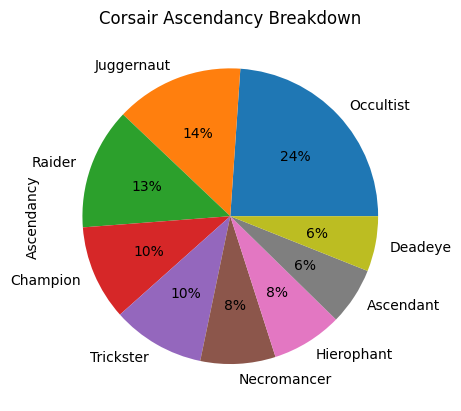

In [39]:
ascended_cor['character_class'].value_counts().plot(title='Corsair Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

We can see that the majority of the Corsairs team is composed of the Occultist. The second most common is Juggernaut, followed by Raider. These make up >50% of the team.

<Axes: title={'center': 'Explorers Ascendancy Breakdown'}, ylabel='Ascendancy'>

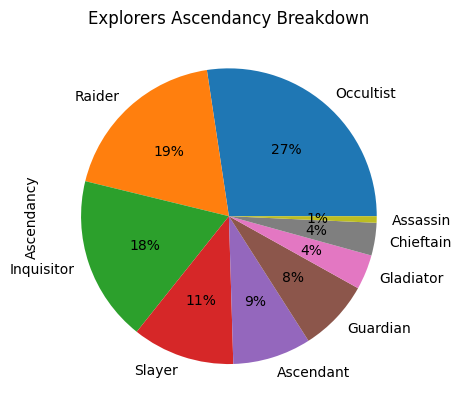

In [41]:
ascended_exp['character_class'].value_counts().plot(title='Explorers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Once again, in explorers, we see that the majority of players once again took up Occultist. The distribution this time forms a larger gap between the top 3 ascendancies and the rest, with Occultist, Raider, and Inquisitor taking up 64% of the team.

<Axes: title={'center': 'Merchants Ascendancy Breakdown'}, ylabel='Ascendancy'>

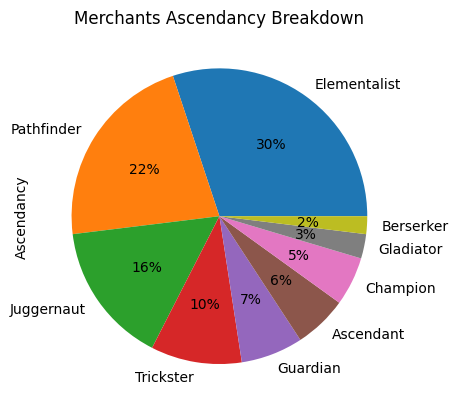

In [42]:
ascended_mer['character_class'].value_counts().plot(title='Merchants Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Instead of Occultist taking the top spot for the Merchants, we have Elementalist at 30%. The top 3 (Elementalist, Pathfinder, and Juggernaut) make up 68% of the team.

<Axes: title={'center': 'Royals Ascendancy Breakdown'}, ylabel='Ascendancy'>

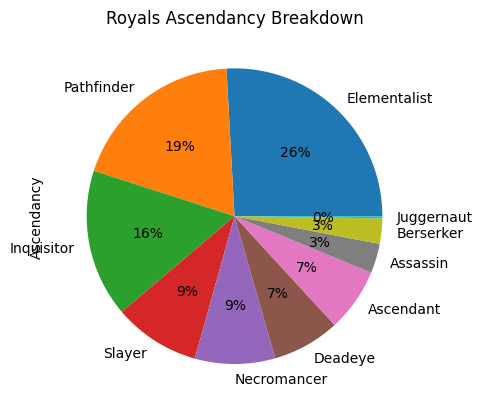

In [43]:
ascended_roy['character_class'].value_counts().plot(title='Royals Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Finally we see that Royals are mostly Elementalist, Pathfinders, and Inquisitors taking up 61%.

From the team distribution breakdowns we can see that the most popular classes are Elementalist and Occultist, with Pathfinder, Inquisitor, Juggernaut and Raider following behind those two. However, we have yet to see what happens once we specify only players who have fully ascended and those who can get to red maps. For the red map condition, we've also chosen to add a condition where the number of atlas passives exceed 50.

In [47]:
capable_cor = ascended_cor[(ascended_cor['fully_ascended'] == True) & 
                           (ascended_cor['num_atlas_passives_allocated'] > 50) & 
                           (ascended_cor['level'] > 90)]

capable_exp = ascended_exp[(ascended_exp['fully_ascended'] == True) & 
                           (ascended_exp['num_atlas_passives_allocated'] > 50) & 
                           (ascended_exp['level'] > 90)]

capable_mer = ascended_mer[(ascended_mer['fully_ascended'] == True) & 
                           (ascended_mer['num_atlas_passives_allocated'] > 50) & 
                           (ascended_mer['level'] > 90)]

capable_roy = ascended_roy[(ascended_roy['fully_ascended'] == True) & 
                           (ascended_roy['num_atlas_passives_allocated'] > 50) & 
                           (ascended_roy['level'] > 90)]

print("Number of capable corsairs:", len(capable_cor))
print("Number of capable explorers:", len(capable_exp))
print("Number of capable merchants:", len(capable_mer))
print("Number of capable royals:", len(capable_roy))


Number of capable corsairs: 197
Number of capable explorers: 176
Number of capable merchants: 186
Number of capable royals: 194


This is particularly interesting. Out of the 400ish ascended players for each team, explorers have the least amount of "capable" players. Compared to the highest of 197 from Corsairs, that's a roughly 12% difference between the maximum and the minimum. 

Coincidentally, the number of capable players on each team also match the placement of each team. I can think of no particular way to extrapolate a null hypothesis to find the significance of this however.

It is, however, worthy, to look at the pie charts again, this time with the narrowed down players.

<Axes: title={'center': 'New Corsair Ascendancy Breakdown'}, ylabel='Ascendancy'>

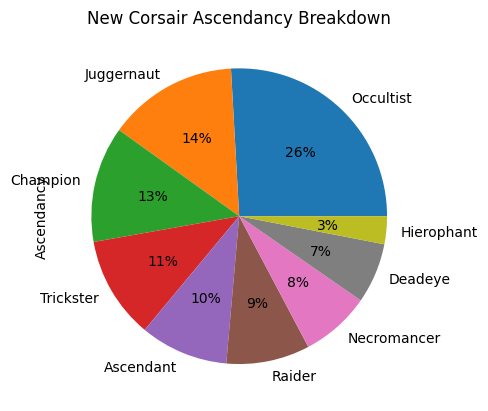

In [52]:
capable_cor['character_class'].value_counts().plot(title='New Corsair Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Hierophant went down drastically. I suspect it wasn't a very popular ascendancy to begin with, and only the most persistent reached the endgame with it.
Raider is where it gets interesting. Previously number 3 in terms of playrate on team Corsair, it is now number 6. I suspect it has something to do with Heist. In addition, ascendant got switched up from second to last place to fifth. I suspect it had something to do with aurabots, but I do not have sufficient information on that front.

<Axes: title={'center': 'New Explorers Ascendancy Breakdown'}, ylabel='Ascendancy'>

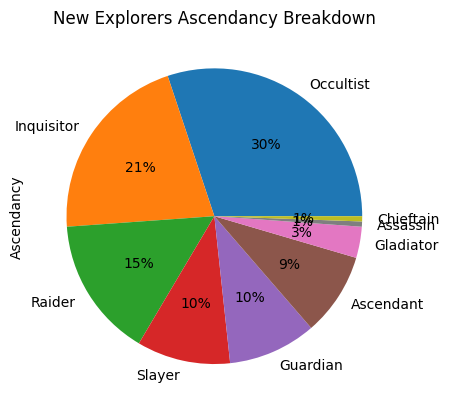

In [50]:
capable_exp['character_class'].value_counts().plot(title='New Explorers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Inquisitor and Raider swapped positions, as did Guardian and Ascendant. I suspect it has something to do with the viability of the classes in Explorers. In the case of Raider, Heist may drop the number of Raiders down a bit, but not enough as there weren't other alternatives to the popular Raider builds. For Guardian, I suspect it may be much more suited for higher end gameplay than Ascendant. 

<Axes: title={'center': 'New Merchants Ascendancy Breakdown'}, ylabel='Ascendancy'>

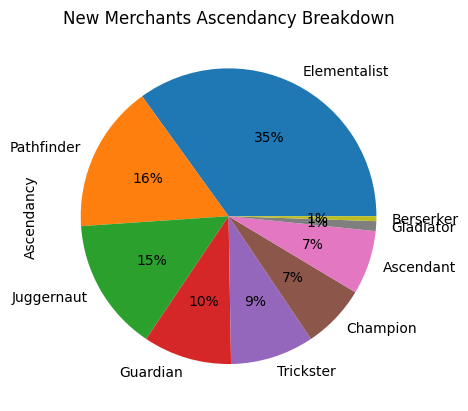

In [51]:
capable_mer['character_class'].value_counts().plot(title='New Merchants Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Guardian and Trickster swapped places, Ascendant and Champion swapped places. The number of Elementalists went up, while the number of Pathfinders went down. It seems that Elementalist's versatility is just too strong for endgame purposes.

<Axes: title={'center': 'New Royals Ascendancy Breakdown'}, ylabel='Ascendancy'>

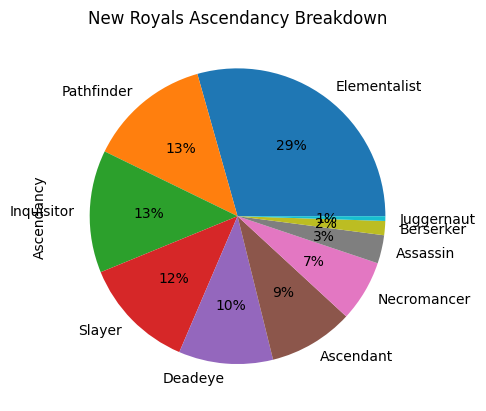

In [53]:
capable_roy['character_class'].value_counts().plot(title='New Royals Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

Not surprisingly, the usage of Elementalist shot up in Royals. Pathfinder went down as expected. Deadeye, Ascendant, and Necromancer swapped their positions around. The portion of Inquisitors went down, while the portion of Slayers increased. 

# On the Topic of Pushers

One of the more common terms in BPL is a pusher - someone incredibly well-versed in the game to quickly complete the campaign and finish the endgame before the first day is even done.

Pushers hold a special position in BPL. Typically, when a person is sorted into a team they are done so randomly. However, for pushers, who are known entities to the organizers, they have to be careful where they put the pushers. Too many pushers on 1 team, and it can easily upset the balance.

It is difficult to qualify what a pusher does, outside of completing acts in under 4 hours and reaching red maps in under 8. For assumptive purposes, I found the subset of level 95+ characters with 100+ atlas completion as pushers.

In [55]:
pushers_cor = ascended_cor[(ascended_cor['fully_ascended'] == True) & 
                           (ascended_cor['num_atlas_passives_allocated'] > 100) & 
                           (ascended_cor['level'] > 95)]

pushers_exp = ascended_exp[(ascended_exp['fully_ascended'] == True) & 
                           (ascended_exp['num_atlas_passives_allocated'] > 100) & 
                           (ascended_exp['level'] > 95)]

pushers_mer = ascended_mer[(ascended_mer['fully_ascended'] == True) & 
                           (ascended_mer['num_atlas_passives_allocated'] > 100) & 
                           (ascended_mer['level'] > 95)]

pushers_roy = ascended_roy[(ascended_roy['fully_ascended'] == True) & 
                           (ascended_roy['num_atlas_passives_allocated'] > 100) & 
                           (ascended_roy['level'] > 95)]

print("Number of pusher corsairs:", len(pushers_cor))
print("Number of pusher explorers:", len(pushers_exp))
print("Number of pusher merchants:", len(pushers_mer))
print("Number of pusher royals:", len(pushers_roy))

Number of pusher corsairs: 26
Number of pusher explorers: 23
Number of pusher merchants: 21
Number of pusher royals: 29


<Axes: title={'center': 'New Pushers Ascendancy Breakdown'}, ylabel='Ascendancy'>

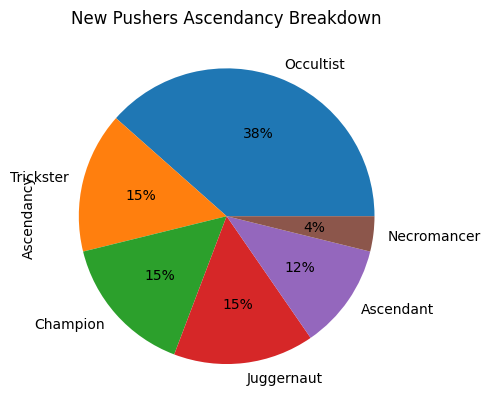

In [58]:
pushers_cor['character_class'].value_counts().plot(title='New Pushers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

<Axes: title={'center': 'New Pushers Ascendancy Breakdown'}, ylabel='Ascendancy'>

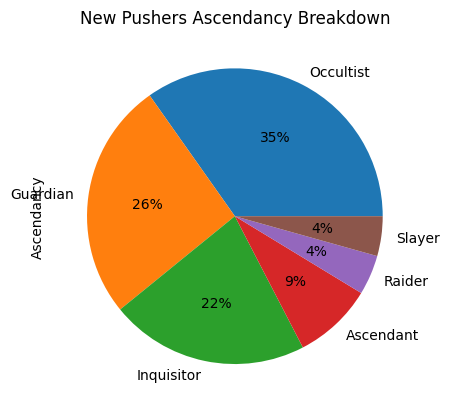

In [59]:
pushers_exp['character_class'].value_counts().plot(title='Explorers Pushers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

<Axes: title={'center': 'Merchant Pushers Ascendancy Breakdown'}, ylabel='Ascendancy'>

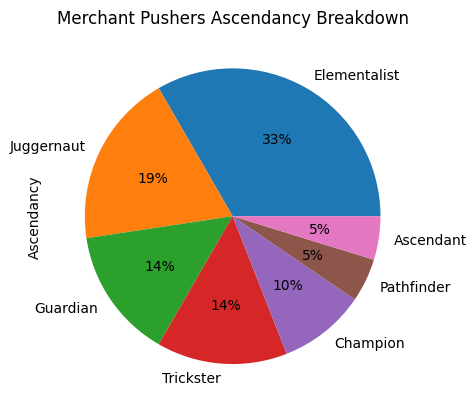

In [62]:
pushers_mer['character_class'].value_counts().plot(title='Merchant Pushers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

<Axes: title={'center': 'New Pushers Ascendancy Breakdown'}, ylabel='Ascendancy'>

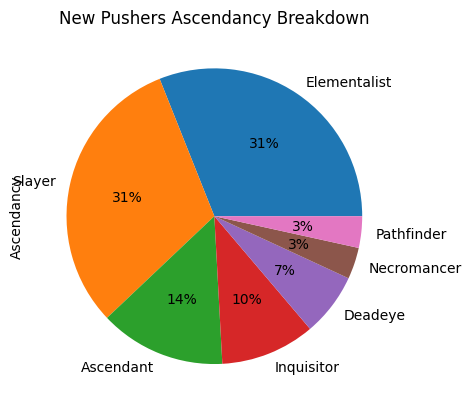

In [61]:
pushers_roy['character_class'].value_counts().plot(title='New Pushers Ascendancy Breakdown', ylabel='Ascendancy', kind='pie', autopct='%1.0f%%')

The problem with identifying pushers is that there are so few of them that any significant changes in the data can be attributed small sample size. I can't say much, but I am not surprised to see that Occultist and Elementalist still hold the top spots.

This is also not an exhaustive cover of all the pushers. Some pushers may have been in Heist, or working in other avenues preventing them from getting to level 95 or getting 100+ atlas passives. In fact, this data suggests more along the lines of the player and ascendancy breakdown of players who can clear large amounts of maps, either solo or as a group. Since this is based on end-of-the-event data, we'll need timed interval data to see the pusher progression before the end of day 4.

# Conclusion

I made some interesting graphs to look at, and I did enjoy trying to analyze the results and hypothesize why things occur the way they did. However, with the given data, I don't believe there's a particularly good way to try and model either a team or a player - not without further input. What struck me as particularly interesting was the number of capable players on each team, and how that matched up with the team placements. Further investigation will go into how those two things correlate.